# PyCaret Time Series Forecasting on weather data from kaggle

dataset: https://www.kaggle.com/datasets/muthuj7/weather-dataset?select=weatherHistory.csv

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's time series forecasting module is now available. The module currently is suitable for univariate / multivariate time series forecasting tasks. The API of time series module is consistent with other modules of PyCaret.

It comes built-in with preprocessing capabilities and over 30 algorithms comprising of statistical / time-series methods as well as machine learning based models. In addition to the model training, this module has lot of other capabilities such as automated hyperparameter tuning, ensembling, model analysis, model packaging and deployment capabilities.

A typical workflow in PyCaret consist of following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** <br/>

In [14]:
# loading weather dataset from kaggle
import pandas as pd

data = pd.read_csv('./time_series/weatherHistory.csv')
print(data.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

<Axes: >

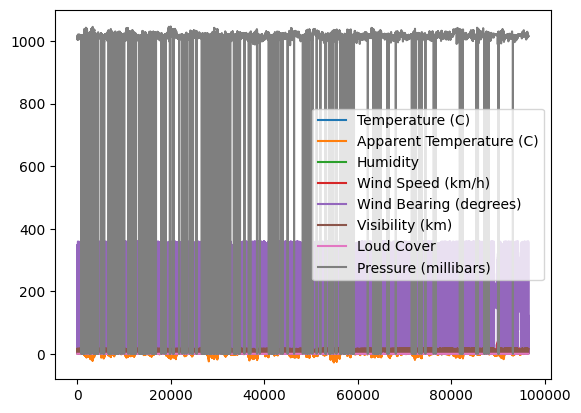

In [5]:
# plot the dataset
data.plot()

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. `Setup` has only one required parameter i.e. `data`. All the other parameters are optional.

In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
# using only target variable - Univariate time series forecasting
y = data['Temperature (C)']
s = setup(data=y, fh = 7, session_id = 123) #fh stands for Forecast Horizon, it tells PyCaret how many future time steps you want to predict beyond your training data.


,Description,Value
0,session_id,123
1,Target,Temperature (C)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(96453, 1)"
5,Transformed data shape,"(96453, 1)"
6,Transformed train set shape,"(96446, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Approach:**  Univariate or multivariate. <br/>
<br/>
- **Exogenous Variables:**  Exogeneous variables to be used in model. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [17]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [18]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [20]:
# init setup on exp
exp.setup(data=y, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Temperature (C)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(96453, 1)"
5,Transformed data shape,"(96453, 1)"
6,Transformed train set shape,"(96450, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Check Stats
The `check_stats` function is used to get summary statistics and run statistical tests on the original data or model residuals.

In [21]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,96453.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,11.932678
3,Summary,Statistics,Transformed,Median,,12.0
4,Summary,Statistics,Transformed,Standard Deviation,,9.551546
5,Summary,Statistics,Transformed,Variance,,91.232037
6,Summary,Statistics,Transformed,Kurtosis,,-0.566791
7,Summary,Statistics,Transformed,Skewness,,0.094127
8,Summary,Statistics,Transformed,# Distinct Values,,7574.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1518734.929091


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [27]:
# compare models using OOP
best = exp.compare_models(include=['naive', 'snaive', 'theta', 'arima'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:14:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.6262,0.4770,2.5451,2.7118,0.0922,0.0892,-5.5706,4.0167
theta,Theta Forecaster,0.6262,0.4770,2.5451,2.7118,0.0922,0.0892,-5.5706,3.9200
snaive,Seasonal Naive Forecaster,0.6962,0.5076,2.8296,2.8857,0.0974,0.1027,-129.5403,3.9800
